<a href="https://colab.research.google.com/github/sarnio1/data-analytics-project/blob/main/Supermarket_Sales_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study I (05/10/2023)**

#### Introduction

In this case study, we delved into the fundamentals of Python data analytics and applied these concepts to a fictitious **supermarket sales dataset**. Our objectives included:

1. Introducing essential Python elements such as common packages for data analytics, variable types, and looping.
2. Analyzing a supermarket sales dataset, including tasks like data import, data cleaning, exploratory data analysis (EDA), and data export.

#### Python Elements

1. *Packages for Data Analytics*. We discussed and utilized commonly used Python packages for data analytics, which include but are not limited to Pandas, Matplotlib, and Seaborn.
2. *Types of Variables*. We covered different variable types in Python, understanding the distinctions between integers, floats, strings, and more.
3. *Looping*. Explained the concept of looping in Python, demonstrating the use of `for` and `in range()` loops for iterative tasks.

#### Supermarket Sales Dataset Analysis

1. *Data Import*. We imported the fictitious supermarket sales dataset into Google Colaboratory, demonstrating the steps to load data into a Python environment (Jupyter Notebook).
2. *Data Reading*. We read and displayed the dataset using Pandas to gain an initial understanding of its structure.
3. *Data Cleaning*. This phase involved data cleaning tasks such as (1) changing data types where necessary, (2) rectifying typographical errors, and (3) handling duplicated data records if any.
4. *Exploratory Data Analysis (EDA)*. We conducted an exploratory data analysis to extract insights from the dataset. This included (1) descriptive statistics and (2) data visualization using Matplotlib and Seaborn.
5. *Data Export*. The final step was exporting the cleaned and analyzed dataset to a CSV format, making it accessible for further analysis or reporting.

#### Case Study Resources

For additional resources related to this case study, you can explore:
#### [**Dashboard (Looker Studio)**](https://lookerstudio.google.com/reporting/8c00ecdb-88b8-4134-9dae-c08d9e1572ba)

# Library

In [ ]:
# These are libraries used for data cleaning and EDA
import pandas as pd #dataset
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

# Introduction to Python

## Variables

In [ ]:
# This is integer
a = 5
b = 6
print(a+b)

11


In [ ]:
# This is float
c = 1.2
d = 1.3
print(c*d)

1.56


In [ ]:
# This is string
e = 'this is string'
print(e)

this is string


## Looping

In [ ]:
print(a+0)
print(a+1)
print(a+2)

5
6
7


In [ ]:
for i in range(5):
  print(a+i)

5
6
7
8
9


# Supermarket Sales Data

## Import file and read data
Link for the data:
#### [**Supermarket Sales (Google Sheets)**](https://docs.google.com/spreadsheets/d/1ibh9XTG8W1ZMv7CiRS4YnYIE7b9U0RGn9us_ATsuApw/edit#gid=1903509374)

In [ ]:
# Import the dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1ibh9XTG8W1ZMv7CiRS4YnYIE7b9U0RGn9us_ATsuApw/edit#gid=1903509374'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
# Show the first five rows of the dataset
df.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity
0,1/5/2019,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7
1,3/8/2019,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5
2,3/3/2019,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7
3,1/27/2019,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8
4,2/8/2019,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7


## Cleaning data

### 1. Changing data type

In [ ]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Payment        1000 non-null   object 
 2   Invoice ID     1000 non-null   object 
 3   Branch         1000 non-null   object 
 4   City           1000 non-null   object 
 5   Customer type  1000 non-null   object 
 6   Gender         1000 non-null   object 
 7   Product line   1000 non-null   object 
 8   Unit price     1000 non-null   float64
 9   Quantity       1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.2+ KB


We identify that the '**Date**' column has an incorrect data type (read as an object), which should be **datetime**.

In [ ]:
# Copy the initial dataframe (optional)
df_cleaned = df.copy()
# Change data type for column 'Date'
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Payment        1000 non-null   object        
 2   Invoice ID     1000 non-null   object        
 3   Branch         1000 non-null   object        
 4   City           1000 non-null   object        
 5   Customer type  1000 non-null   object        
 6   Gender         1000 non-null   object        
 7   Product line   1000 non-null   object        
 8   Unit price     1000 non-null   float64       
 9   Quantity       1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 78.2+ KB


The 'Date' column now has been changed, the data type is appeared as 'datetime64[ns]'.

### 2. Adding a new column

In [ ]:
# Add a new column
df_cleaned['Revenue'] = df_cleaned['Unit price']*df_cleaned['Quantity']
df_cleaned.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


### 3. Identifying missing value

In [ ]:
# Check total missing value
df.isna().sum()

Date             0
Payment          0
Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
dtype: int64

No missing value is identified.

### 4. Identifying typographical errors

In [ ]:
# Identify each column name, this is a quick step to get a list of the column names in the dataset (optional)
df.columns

Index(['Date', 'Payment', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line', 'Unit price', 'Quantity'],
      dtype='object')

In [ ]:
# Check typographical errors in an individual column
df_cleaned['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [ ]:
df_cleaned['Gender'].value_counts()

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64

In [ ]:
# Implement looping to check typographical errors in all columns
for col_name in ['Payment', 'Branch', 'City', 'Customer type',
       'Gender', 'Product line']:
       print(df_cleaned[col_name].value_counts(), '\n')

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

A    340
B    332
C    328
Name: Branch, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    498
Male      490
male        9
female      2
fml         1
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64 



We encountered typographical errors in the '**Gender**' column, resulting in inconsistent labels for gender categories. To ensure data uniformity, we standardized this column to have only two labels, '**Female**' and '**Male**,' as required for our analysis.

In [ ]:
# Replace typographycal errors
dict_typo = {'male':'Male',
             'female':'Female',
             'fml':'Female'}
df_replaced = df_cleaned.replace(dict_typo)
print(df_replaced['Gender'].value_counts())
df_replaced.head()

Female    501
Male      499
Name: Gender, dtype: int64


,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


### 5. Identifying duplicated data

In [ ]:
# Check duplicated data
df_replaced['Invoice ID'].duplicated()
df_replaced['Invoice ID'].duplicated().sum()

0

No duplicated data is identified.

## Exploratory data analysis (EDA)

### 1. Daily trend

In [ ]:
# Total revenue and quantity sold daily
agg_daily = df_replaced.groupby('Date', as_index=False)['Quantity', 'Revenue'].sum()
agg_daily.head()

<ipython-input-156-c4f42d051d27>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_daily = df_replaced.groupby('Date', as_index=False)['Quantity', 'Revenue'].sum()


,Date,Quantity,Revenue
0,2019-01-01,81,4519.22
1,2019-01-02,48,1852.86
2,2019-01-03,37,1979.17
3,2019-01-04,32,1546.37
4,2019-01-05,55,3368.27


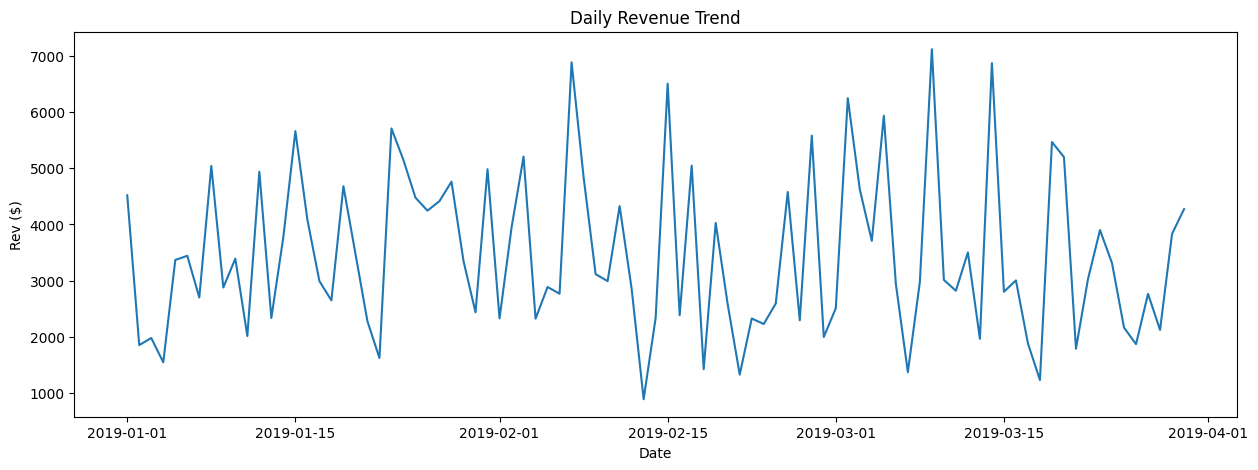

In [ ]:
# Draw daily revenue trend in a line plot
plt.rcParams["figure.figsize"] = (15,5)
plt.plot('Date', 'Revenue', data = agg_daily)
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Rev ($)')
plt.show()

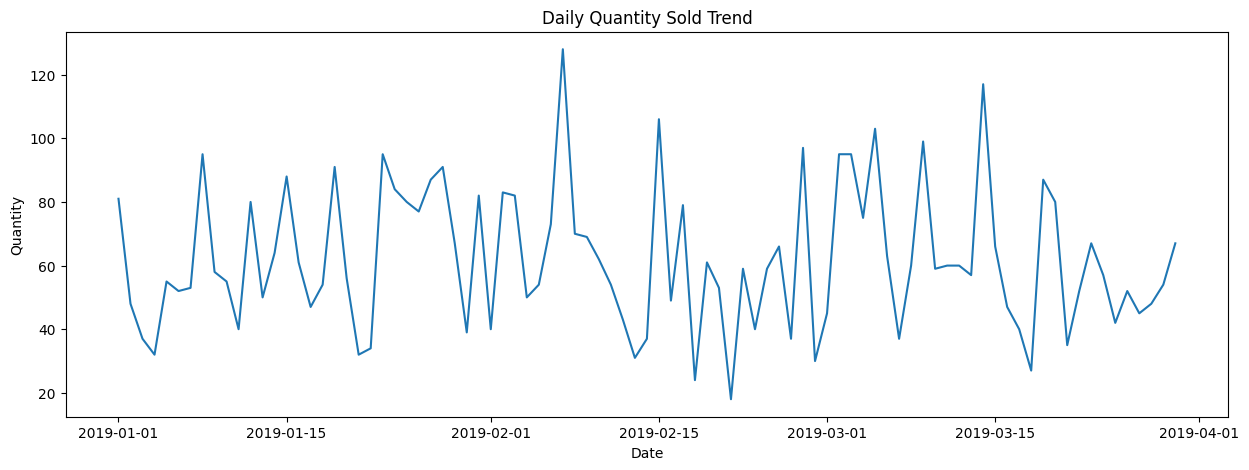

In [ ]:
# Draw daily quantity sold trend in a line plot
plt.rcParams["figure.figsize"] = (15,5)
sns.lineplot(data=agg_daily,x='Date',y='Quantity')
plt.title('Daily Quantity Sold Trend')
plt.show()

The sales revenue and quantity sold data for the supermarket exhibits clear signs of **seasonality**. This means that the data demonstrates recurring and predictable patterns over specific time intervals, which are indicative of distinct seasonal influences.

### 2. Total revenue and customers by payment methods

In [ ]:
# Total revenue and customers by payment methods
agg_payment = df_replaced.groupby('Payment', as_index=False).agg({'Revenue':'sum', 'Invoice ID':'nunique'})
agg_payment.head()

,Payment,Revenue,Invoice ID
0,Cash,106863.40,344
1,Credit card,95968.64,311
2,Ewallet,104755.34,345


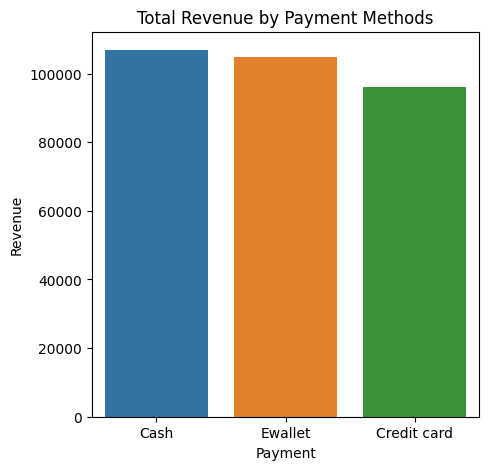

In [ ]:
# Draw total revenue by payment methods in a bar plot
plt.rcParams["figure.figsize"] = (5,5)
plt.title('Total Revenue by Payment Methods')
sns.barplot(data = agg_payment.sort_values('Revenue', ascending=False), x='Payment', y='Revenue')
plt.show()

**Cash** payment method stands out as the primary source of revenue.

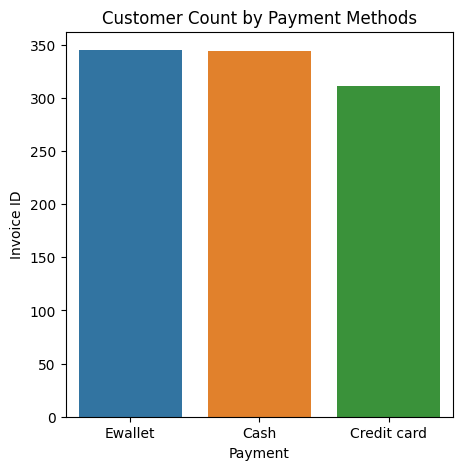

In [ ]:
# Draw customer count by payment methods in a bar plot
plt.rcParams["figure.figsize"] = (5,5)
plt.title('Customer Count by Payment Methods')
sns.barplot(data = agg_payment.sort_values('Invoice ID', ascending=False), x='Payment', y='Invoice ID')
plt.show()

**Ewallet** emerges as the preferred payment method for the majority of customers,

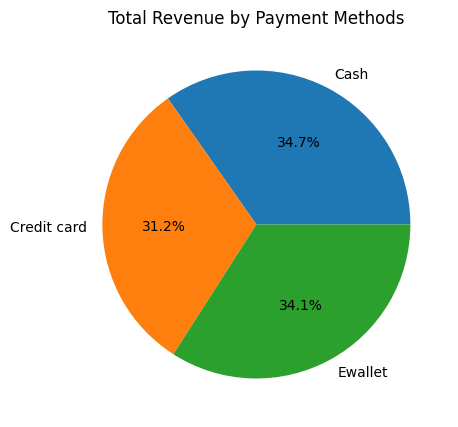

In [ ]:
# Draw total revenue by payment methods in a pie chart
plt.rcParams["figure.figsize"] = (5,5)
plt.title('Total Revenue by Payment Methods')
plt.pie(agg_payment['Revenue'], labels = agg_payment['Payment'], autopct='%.1f%%')
plt.show()

The main source of revenue comes from **Cash** transactions, contributing significantly at **34.7%**. This places cash above other payment methods, including Credit Card at 31.2% and Ewallet at 34.1%, confirming its role as the top revenue generator.

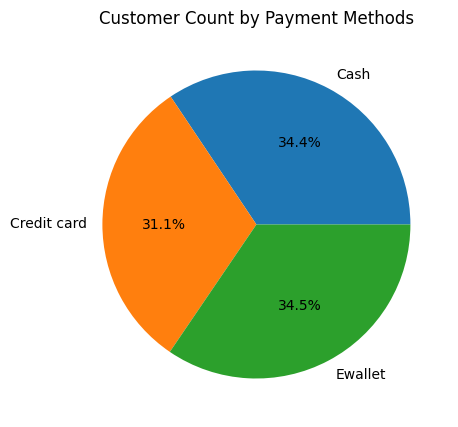

In [ ]:
# Draw customer count by payment methods in a pie chart
plt.rcParams["figure.figsize"] = (5,5)
plt.title('Customer Count by Payment Methods')
plt.pie(agg_payment['Invoice ID'], labels = agg_payment['Payment'], autopct='%.1f%%')
plt.show()

The majority of customers predominantly choose **Ewallet** transactions, contributing significantly at **34.5%**. This positions Ewallet ahead of other payment methods, exceeding Cash at 34.4% and Credit Card at 31.1%, reaffirming its status as the preferred payment method for the majority of customers.

### 3. Total revenue and customers by gender and product line

In [ ]:
# Total revenue and customers by gender
agg_gender = df_replaced.groupby('Gender', as_index=False).agg({'Revenue':'sum', 'Invoice ID':'nunique'})
agg_gender.head()

,Gender,Revenue,Invoice ID
0,Female,159888.50,501
1,Male,147698.88,499


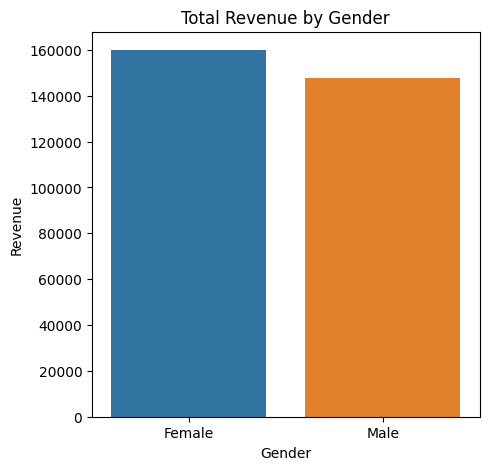

In [ ]:
# Draw total revenue by gender in a bar plot
plt.rcParams["figure.figsize"] = (5,5)
sns.barplot(data=agg_gender.sort_values('Revenue', ascending=False), x='Gender', y='Revenue')
plt.title('Total Revenue by Gender')
plt.show()

**Females** demonstrate a tendency to make more purchases than males, suggesting that the primary source of revenue originates from female customers.

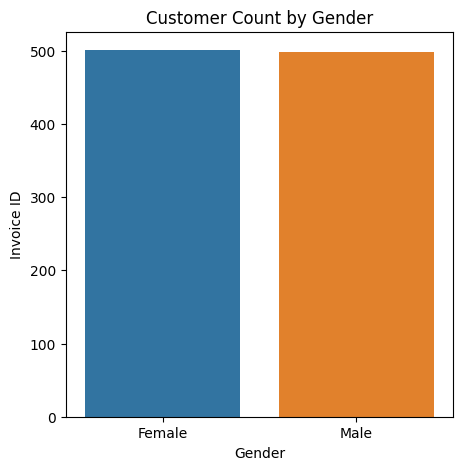

In [ ]:
# Draw customer count by gender in a bar plot
plt.rcParams["figure.figsize"] = (5,5)
sns.barplot(data=agg_gender.sort_values('Invoice ID', ascending=False), x='Gender', y='Invoice ID')
plt.title('Customer Count by Gender')
plt.show()

The distribution of customers is relatively even between females and males, with **females** slightly outnumbering males (501 vs. 499).

In [ ]:
# Total revenue and customers by product line
agg_productline = df_replaced.groupby('Product line', as_index=False).agg({'Revenue':'sum', 'Invoice ID':'nunique'})
agg_productline.head()

,Product line,Revenue,Invoice ID
0,Electronic accessories,51750.03,170
1,Fashion accessories,51719.90,178
2,Food and beverages,53471.28,174
3,Health and beauty,46851.18,152
4,Home and lifestyle,51297.06,160


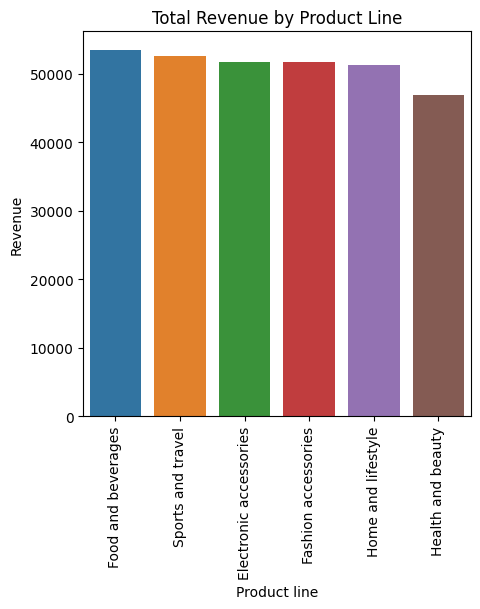

In [ ]:
# Draw total revenue by product line in a bar plot
plt.rcParams["figure.figsize"] = (5,5)
sns.barplot(data=agg_productline.sort_values('Revenue', ascending=False), x='Product line', y='Revenue')
plt.title('Total Revenue by Product Line')
# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')
plt.show()

**Food and beverages** stand out as the supermarket's most significant revenue-generating products.

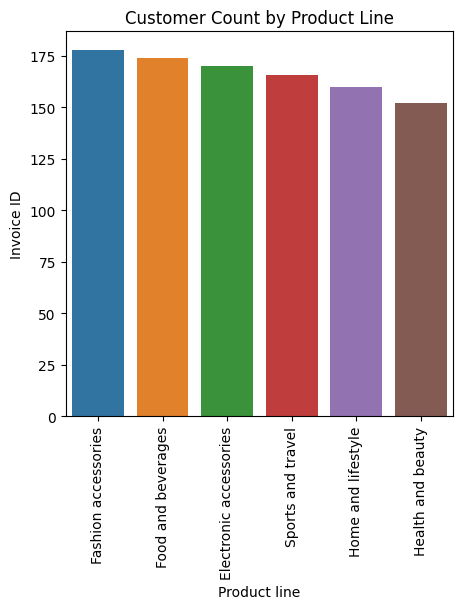

In [ ]:
# Draw customer count by product line in a bar plot
plt.rcParams["figure.figsize"] = (5,5)
sns.barplot(data=agg_productline.sort_values('Invoice ID', ascending=False), x='Product line', y='Invoice ID')
plt.title('Customer Count by Product Line')
# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')
plt.show()

The majority of customers purchase **fashion accessories**, making them the most bought products by customers.

## Export file

In [ ]:
# Export cleaned data to CSV format

from google.colab import files
df_replaced.to_csv('Supermarket Sales_Python Course.csv')
files.download('Supermarket Sales_Python Course.csv')

#### You can retrieve the cleaned data from the following source:

#### [**Cleaned Data**](https://docs.google.com/spreadsheets/d/1AnqwOjfIdkYgUObHSCvcnwJ159HGJCdx_jwHuE3Lgh0/edit?usp=sharing)